In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
checkin = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\filtered_checkin_final.csv")
checkin.head(3)

,business_id,date
0,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."
1,--pDYWb4DzqKdAdrPcxuaA,"2013-03-25 19:29:51, 2013-05-31 23:45:58, 2013..."
2,-0i2KNr7WrCsDF5m0IViJg,"2010-03-25 17:00:35, 2010-08-11 17:50:29, 2010..."


In [3]:
# new column with the count of checkins["date"]

checkin["checkin_count"] = checkin["date"].apply(lambda x: len(x.split(",")))
checkin.head(3)

,business_id,date,checkin_count
0,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015...",34
1,--pDYWb4DzqKdAdrPcxuaA,"2013-03-25 19:29:51, 2013-05-31 23:45:58, 2013...",35
2,-0i2KNr7WrCsDF5m0IViJg,"2010-03-25 17:00:35, 2010-08-11 17:50:29, 2010...",82


In [4]:
business = pd.read_csv(r"C:\Users\Giuseppe Branca\Desktop\Bootcamp miscellanea\PROYECTO\github\tampa_bay_30_final.csv")
business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,final_category
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602.0,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, , Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",food trucks
1,0qNpTGTcqPwOLi2hADx4Xw,Charlie's Market,2815 E Sligh Ave,Tampa,FL,33610.0,28.010360,-82.430042,3.0,9,1,"{'BusinessParking': ""{'garage': False, 'street...",", Grocery, Convenience Stores",NaN,grocery
2,uI9XODGY_2_ieTE6xJ0myw,Roman Forum,10440 N Dale Mabry Hwy,Tampa,FL,33618.0,28.046203,-82.505053,4.0,23,0,"{'BusinessParking': ""{'garage': False, 'street...",", American (New), Italian","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:...",american


In [5]:
# create df from business with only business_id, latitude, longitude and reviews count

df1 = business[["business_id", "latitude", "longitude", "review_count"]]

# merge checkin and business on business_id and drop "date" column

df = pd.merge(df1, checkin, on="business_id")
df.drop(columns=["date"], inplace=True)

# create column "interactions" as the sum of "checkin_count" and "review_count"

df["interactions"] = df["checkin_count"] + df["review_count"]

# drop checkin_count and review_count

df.drop(columns=["checkin_count", "review_count"], inplace=True)

# drop business_id

df.drop(columns=["business_id"], inplace=True)

df.head(3)

,latitude,longitude,interactions
0,27.955269,-82.456320,14
1,28.010360,-82.430042,12
2,28.046203,-82.505053,47


In [15]:
# latitude < 30 (outliers, out of area of interest)

df = df[df["latitude"] < 30]

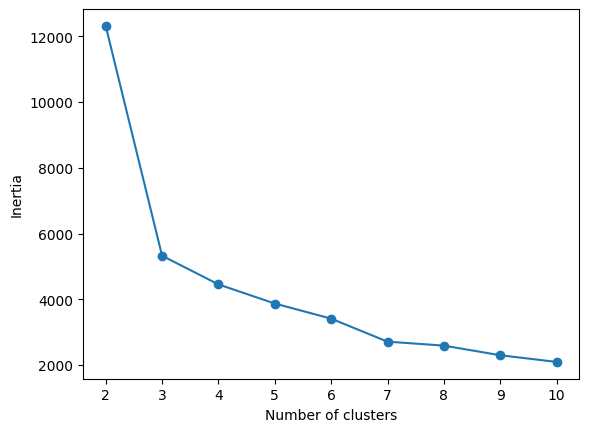

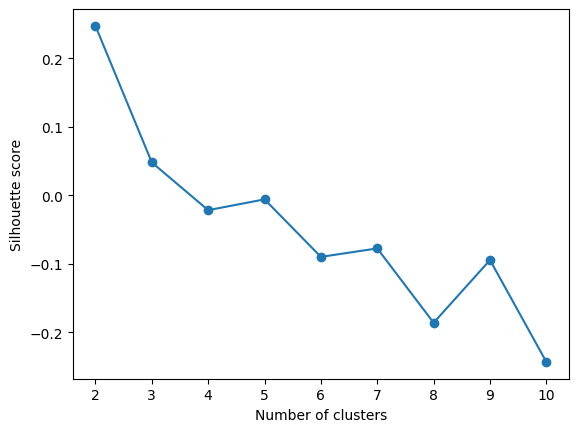

In [16]:
inertia = []
s_scores = []

for i in range(2, 11):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=i)
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(df)
    
    inertia.append(kmeans.inertia_)
    s_scores.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2, 11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

plt.plot(range(2, 11), s_scores, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [17]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [18]:
df["cluster"] = pipeline.predict(df)

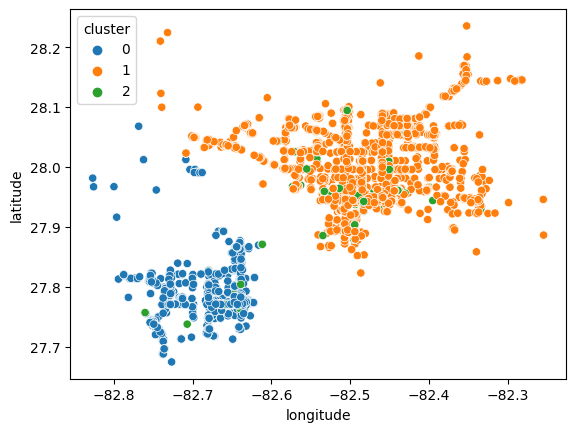

In [19]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue="cluster", palette="tab10")
plt.show()

In [20]:
df["cluster"].value_counts()

cluster
1    3152
0    1261
2     251
Name: count, dtype: int64

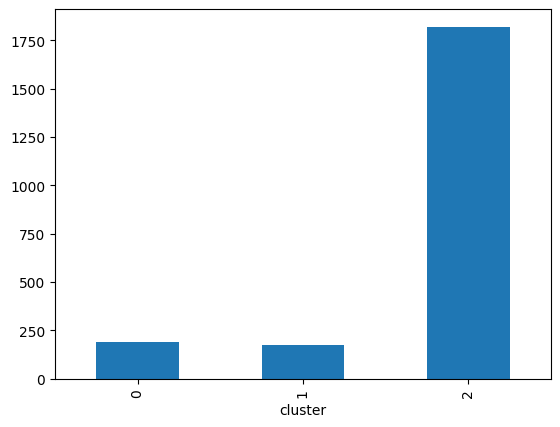

In [23]:
# plot interaction by cluster

df.groupby("cluster")["interactions"].mean().plot(kind="bar")
plt.show()